In [1]:
import pandas as pd
from scipy.stats import zscore
import numpy as np
from sklearn.preprocessing import StandardScaler


In [2]:
weather = pd.read_csv('weather.csv', index_col="DATE")
weather1 = pd.read_csv('updatedWeather.csv', index_col="DATE")
combined_weather = pd.concat([weather, weather1])

In [3]:
null_perc = combined_weather.apply(pd.isnull).sum()/combined_weather.shape[0]

In [4]:
working_columns = combined_weather.columns[null_perc < 0.05]

In [5]:
combined_weather = combined_weather[working_columns].copy()

In [6]:
combined_weather

,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28.0,22.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31.0,22.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38.0,25.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31.0,23.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35.0,21.0
...,...,...,...,...,...,...,...
2024-06-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,84.0,68.0
2024-06-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,91.0,68.0
2024-06-22,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.04,0.0,0.0,87.0,72.0


In [7]:
combined_weather = combined_weather.ffill()
combined_weather.dtypes
combined_weather['TMAX'] = combined_weather['TMAX'].astype(int)
combined_weather['TMIN'] = combined_weather['TMIN'].astype(int)

In [8]:
combined_weather.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2024-06-15', '2024-06-16', '2024-06-17', '2024-06-18', '2024-06-19',
       '2024-06-20', '2024-06-21', '2024-06-22', '2024-06-23', '2024-06-24'],
      dtype='object', name='DATE', length=19899)

In [9]:
combined_weather.index = pd.to_datetime(combined_weather.index)

In [10]:
combined_weather.index.year.value_counts().sort_index()

DATE
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    365
2024    176
Name: count, dtype: int64

In [11]:
combined_weather

,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21
...,...,...,...,...,...,...,...
2024-06-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,84,68
2024-06-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,91,68
2024-06-22,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.04,0.0,0.0,87,72


<Axes: xlabel='DATE'>

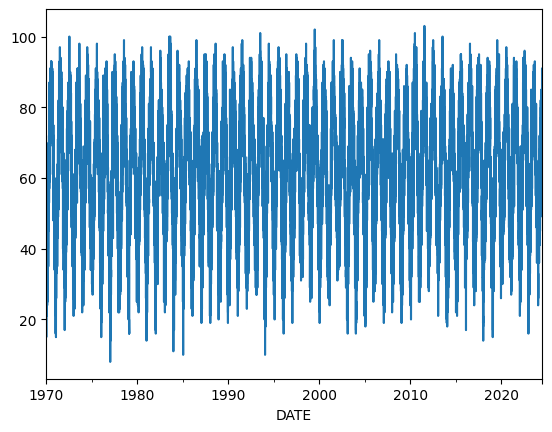

In [12]:
import matplotlib
combined_weather["TMAX"].plot()

In [13]:
combined_weather["TARGET"] = combined_weather.shift(-1) ["TMAX"]

In [14]:
combined_weather

,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN,TARGET
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0
...,...,...,...,...,...,...,...,...
2024-06-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,84,68,91.0
2024-06-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,91,68,87.0
2024-06-22,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.04,0.0,0.0,87,72,85.0


In [15]:
combined_weather = combined_weather.ffill()

In [16]:
from sklearn.linear_model import Ridge

In [17]:
non_numeric_columns = combined_weather.select_dtypes(exclude=[np.number]).columns
combined_weather_numeric = combined_weather.drop(columns=non_numeric_columns)
correlation_matrix = combined_weather_numeric.corr()
correlation_matrix

,PRCP,SNOW,SNWD,TMAX,TMIN,TARGET
PRCP,1.000000,0.146881,0.000978,-0.008163,0.051543,-0.003928
SNOW,0.146881,1.000000,0.234235,-0.173812,-0.158007,-0.171469
SNWD,0.000978,0.234235,1.000000,-0.257248,-0.254322,-0.238625
TMAX,-0.008163,-0.173812,-0.257248,1.000000,0.955083,0.914940
TMIN,0.051543,-0.158007,-0.254322,0.955083,1.000000,0.914868
TARGET,-0.003928,-0.171469,-0.238625,0.914940,0.914868,1.000000


In [18]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

rr = Ridge(alpha=.1)

def train_random_forest(X, y, test_size=0.2, random_state=42, n_estimators=100):

    # split the data for testing and training (aka X and y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)

    # fitting the model
    rf_model.fit(X_train, y_train)

    # prediction
    predictions = rf_model.predict(X_test)

    mae = mean_absolute_error(y_test, predictions)

    print(f"Mean Absolute Error: {mae}")

    return mae

In [19]:
predictors = combined_weather.columns[~combined_weather.columns.isin(["TARGET", "NAME", "STATION"])]
predictors

Index(['PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [20]:
def backtest(combined_weather, model, predictors, start=3650, step=90):
    all_predictions =[]
    for i in range(start, combined_weather.shape[0], step):
        train = combined_weather.iloc[:i, :]
        test = combined_weather.iloc[i:(i+step), :]

        model.fit(train[predictors], train["TARGET"])
        preds = model.predict(test[predictors])

        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["TARGET"], preds], axis=1)

        combined.columns = ["ACTUAL", "PREDICTION"]

        combined["DIFF"] = (combined["PREDICTION"] - combined["ACTUAL"]).abs()
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [21]:
X = combined_weather[predictors].values
y = combined_weather['TARGET'].values 
predictions_rf = train_random_forest(X, y)
predictions = backtest(combined_weather, rr, predictors)
predictions
predictions_rf

Mean Absolute Error: 5.31663006895424


np.float64(5.31663006895424)

In [22]:
mean_absolute_error(predictions["ACTUAL"], predictions["PREDICTION"])

np.float64(5.136374798382137)

In [23]:
pd.Series(rr.coef_, index=predictors)

PRCP   -1.199290
SNOW   -0.412892
SNWD    0.052635
TMAX    0.450631
TMIN    0.513627
dtype: float64

In [24]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(combined_weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    combined_weather[label] = combined_weather[col].rolling(horizon).mean()
    combined_weather[f"{label}_pct"] = pct_diff(combined_weather[label], combined_weather[col])
    return combined_weather
    
rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ["TMAX", "TMIN", "PRCP"]:
        combined_weather = compute_rolling(combined_weather, horizon, col)

In [25]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["TMAX", "TMIN", "PRCP"]:
    combined_weather[f"month_avg_{col}"] = combined_weather[col].groupby(combined_weather.index.month, group_keys=False).apply(expand_mean)
    combined_weather[f"day_avg_{col}"] = combined_weather[col].groupby(combined_weather.index.day_of_year, group_keys=False).apply(expand_mean)


In [26]:
combined_weather = combined_weather.iloc[14:,:]
combined_weather = combined_weather.fillna(0)

In [27]:
predictors = combined_weather.columns[~combined_weather.columns.isin(["TARGET", "NAME", "STATION"])]
predictions = backtest(combined_weather, rr, predictors)
mean_absolute_error(predictions["ACTUAL"], predictions["PREDICTION"])

np.float64(4.789186505846942)

In [28]:
mean_squared_error(predictions["ACTUAL"], predictions["PREDICTION"])

np.float64(37.55766036964321)

In [29]:
predictions.sort_values("DIFF", ascending=False)

,ACTUAL,PREDICTION,DIFF
DATE,,,
1990-03-12,85.0,54.369353,30.630647
2007-03-26,78.0,49.981156,28.018844
1998-03-26,80.0,52.009052,27.990948
2003-04-15,86.0,59.418323,26.581677
1985-04-18,84.0,58.463358,25.536642
...,...,...,...
2001-12-02,53.0,53.002346,0.002346
1986-08-05,82.0,82.001182,0.001182
1985-08-03,80.0,79.999022,0.000978


In [30]:
combined_weather.loc["1990-03-07": "1990-03-17"]

,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN,TARGET,rolling_3_TMAX,rolling_3_TMAX_pct,...,rolling_14_TMIN,rolling_14_TMIN_pct,rolling_14_PRCP,rolling_14_PRCP_pct,month_avg_TMAX,day_avg_TMAX,month_avg_TMIN,day_avg_TMIN,month_avg_PRCP,day_avg_PRCP
DATE,,,,,,,,,,,,,,,,,,,,,
1990-03-07,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,2.0,32,14,39.0,33.666667,-0.049505,...,25.000000,-0.440000,0.047857,-1.000000,48.590112,45.428571,34.567783,31.857143,0.119410,0.111429
1990-03-08,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,1.0,39,20,43.0,35.000000,0.114286,...,24.071429,-0.169139,0.040714,-1.000000,48.574841,46.571429,34.544586,31.190476,0.119220,0.076667
1990-03-09,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.01,0.0,0.0,43,29,47.0,38.000000,0.131579,...,22.785714,0.272727,0.031429,-0.681818,48.565978,45.619048,34.535771,30.952381,0.119046,0.036190
1990-03-10,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.01,0.0,0.0,47,39,59.0,43.000000,0.093023,...,23.428571,0.664634,0.020714,-0.517241,48.563492,43.809524,34.542857,31.761905,0.118873,0.071905
1990-03-11,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.05,0.0,0.0,59,41,59.0,49.666667,0.187919,...,25.500000,0.607843,0.021429,1.333333,48.580032,46.142857,34.553090,31.904762,0.118764,0.126667
1990-03-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,59,43,85.0,55.000000,0.072727,...,27.928571,0.539642,0.021429,-1.000000,48.596519,48.142857,34.566456,34.285714,0.118576,0.167619
1990-03-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,85,41,62.0,67.666667,0.256158,...,29.500000,0.389831,0.020000,-1.000000,48.654028,48.761905,34.576619,34.285714,0.118389,0.091429
1990-03-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,62,46,55.0,68.666667,-0.097087,...,30.857143,0.490741,0.020000,-1.000000,48.675079,50.190476,34.594637,36.809524,0.118202,0.259524
1990-03-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,55,43,62.0,67.333333,-0.183168,...,32.214286,0.334812,0.020000,-1.000000,48.685039,49.714286,34.607874,35.761905,0.118016,0.066667


<Axes: xlabel='DIFF'>

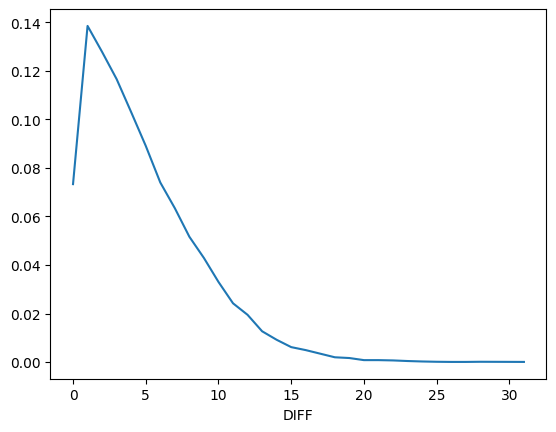

In [31]:
(predictions["DIFF"].round().value_counts().sort_index() / predictions.shape[0]).plot()

In [32]:
mean_absolute_error(predictions["ACTUAL"], predictions["PREDICTION"])

np.float64(4.789186505846942)

In [33]:
combined_weather['PRCP_3d_lag'] = combined_weather['PRCP'].shift(3)
combined_weather['TMAX_3d_lag'] = combined_weather['TMAX'].shift(3)
combined_weather['TMIN_3d_lag'] = combined_weather['TMIN'].shift(3)
combined_weather['PRCP_7d_lag'] = combined_weather['PRCP'].shift(7)
combined_weather['TMAX_7d_lag'] = combined_weather['TMAX'].shift(7)
combined_weather['TMIN_7d_lag'] = combined_weather['TMIN'].shift(7)

In [34]:
combined_weather = combined_weather.fillna(0)

In [35]:
predictions

,ACTUAL,PREDICTION,DIFF
DATE,,,
1980-01-13,54.0,32.430619,21.569381
1980-01-14,51.0,44.600179,6.399821
1980-01-15,45.0,46.846655,1.846655
1980-01-16,40.0,42.211921,2.211921
1980-01-17,41.0,40.865606,0.134394
...,...,...,...
2024-06-20,91.0,81.868506,9.131494
2024-06-21,87.0,84.671484,2.328516
2024-06-22,85.0,84.818407,0.181593


In [36]:
predictions_rf = train_random_forest(X, y)
predictions_rf

Mean Absolute Error: 5.31663006895424


np.float64(5.31663006895424)

In [38]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

 # Grid Search is not working
"""
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

tscv = TimeSeriesSplit(n_splits=5) 
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error')
grid_search.fit(X, y)
best_model = grid_search.best_estimator_  
best_params = grid_search.best_params_    
cv_results = grid_search.cv_results_     
prediction_of_model = best_model.predict(X) 
print("Grid Search for RandomForestRegressor Model...")
rf_search = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=tscv, scoring='neg_mean_squared_error')
rf_search.fit(X_train, y_train)
"""


'\nparam_grid = {\n    \'n_estimators\': [50, 100, 200],\n    \'max_depth\': [None, 10, 20],\n    \'min_samples_split\': [2, 5, 10]\n}\n\ntscv = TimeSeriesSplit(n_splits=5) \nrf_model = RandomForestRegressor(random_state=42)\ngrid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=tscv, scoring=\'neg_mean_squared_error\')\ngrid_search.fit(X, y)\nbest_model = grid_search.best_estimator_  \nbest_params = grid_search.best_params_    \ncv_results = grid_search.cv_results_     \nprediction_of_model = best_model.predict(X) \nprint("Grid Search for RandomForestRegressor Model...")\nrf_search = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=tscv, scoring=\'neg_mean_squared_error\')\nrf_search.fit(X_train, y_train)\n'